#**Fantastic Four**

---



Nama Anggota :

                   - Farel Nandana Tahir    /2408301022
                   - Surya Aldi Susilo     /2408301086
                   - Muhammad Jazuli      /2408301093
                   - Baihaqi Nur Muhammad/24083010111
                   

              


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

📘 DATA DICTIONARY

1. mpg	=	Miles per gallon – efisiensi bahan bakar mobil (semakin tinggi semakin irit)

2. cylinders	=	Jumlah silinder pada mesin mobil

3. displacement	=	Kapasitas mesin atau volume silinder total	cubic inches (ci),

4. horsepower	=	Daya mesin mobil	horsepower (HP)

5. weight	=	Berat kendaraan	pound (lbs)

6. acceleration	=	Waktu percepatan dari 0–60 mph	detik

7. model year	=	Tahun model kendaraan (dua digit)

8. origin	=	Asal kendaraan (kode wilayah produksi)	1 = USA, 2 = Eropa, 3 = Jepang

9. car name	= (string)	Nama lengkap merek dan model mobil

#Preperation Data

In [ ]:
df = pd.read_csv('mpg.csv')
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
display(outliers)

,0
mpg,1
cylinders,0
displacement,0
weight,0
acceleration,7
model year,0
origin,0


In [ ]:
num_cols = df.select_dtypes(include=[np.number])
print("\n=== KOLOM NUMERIK ===")
print(num_cols.columns)


=== KOLOM NUMERIK ===
Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')


#Correlation Check

Pearson Correlation

In [ ]:
corr_pearson = num_cols.corr(method='pearson')

print("=== KORELASI PEARSON ===")
print(corr_pearson)

=== KORELASI PEARSON ===
                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


Spearman Correlation

In [ ]:
corr_spearman = num_cols.corr(method='spearman')

print("=== KORELASI SPEARMAN ===")
print(corr_spearman)

=== KORELASI SPEARMAN ===
                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.821864     -0.855692 -0.874947      0.438677   
cylinders    -0.821864   1.000000      0.911876  0.873314     -0.474189   
displacement -0.855692   0.911876      1.000000  0.945986     -0.496512   
weight       -0.874947   0.873314      0.945986  1.000000     -0.404550   
acceleration  0.438677  -0.474189     -0.496512 -0.404550      1.000000   
model year    0.573469  -0.335012     -0.305257 -0.277015      0.274632   
origin        0.580694  -0.604550     -0.707197 -0.628434      0.220574   

              model year    origin  
mpg             0.573469  0.580694  
cylinders      -0.335012 -0.604550  
displacement   -0.305257 -0.707197  
weight         -0.277015 -0.628434  
acceleration    0.274632  0.220574  
model year      1.000000  0.166551  
origin          0.166551  1.000000  


Kendall Correlation

In [ ]:
corr_kendall = num_cols.corr(method='kendall')

print("=== KORELASI KENDALL ===")
print(corr_kendall)

=== KORELASI KENDALL ===
                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.686477     -0.679847 -0.694006      0.301096   
cylinders    -0.686477   1.000000      0.794854  0.735481     -0.367194   
displacement -0.679847   0.794854      1.000000  0.800508     -0.352110   
weight       -0.694006   0.735481      0.800508  1.000000     -0.268619   
acceleration  0.301096  -0.367194     -0.352110 -0.268619      1.000000   
model year    0.413661  -0.273742     -0.218920 -0.196863      0.196024   
origin        0.467249  -0.551610     -0.570074 -0.496185      0.173055   

              model year    origin  
mpg             0.413661  0.467249  
cylinders      -0.273742 -0.551610  
displacement   -0.218920 -0.570074  
weight         -0.196863 -0.496185  
acceleration    0.196024  0.173055  
model year      1.000000  0.136967  
origin          0.136967  1.000000  


#Visualisation


Pearson Heatmap

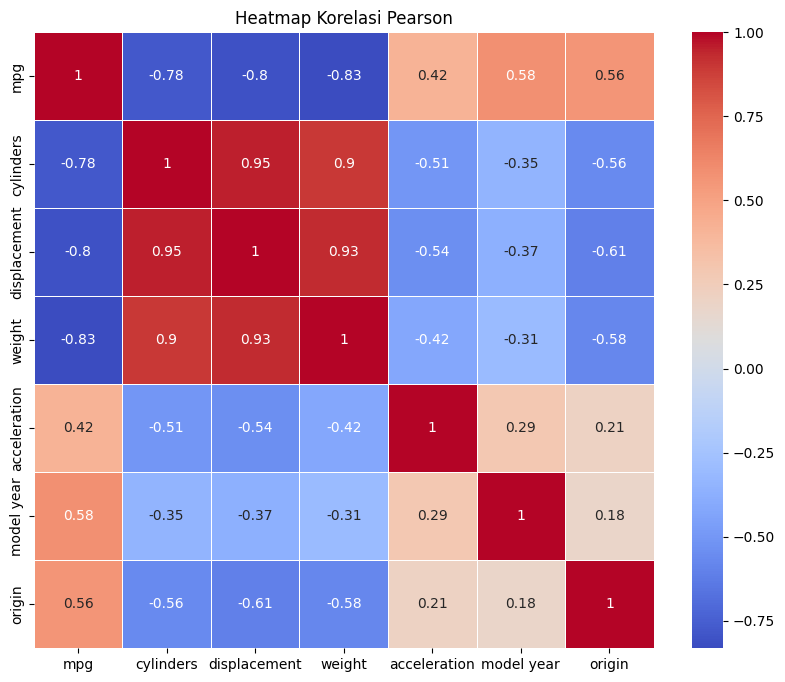

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Pearson")
plt.show()

Spearman Heatmap

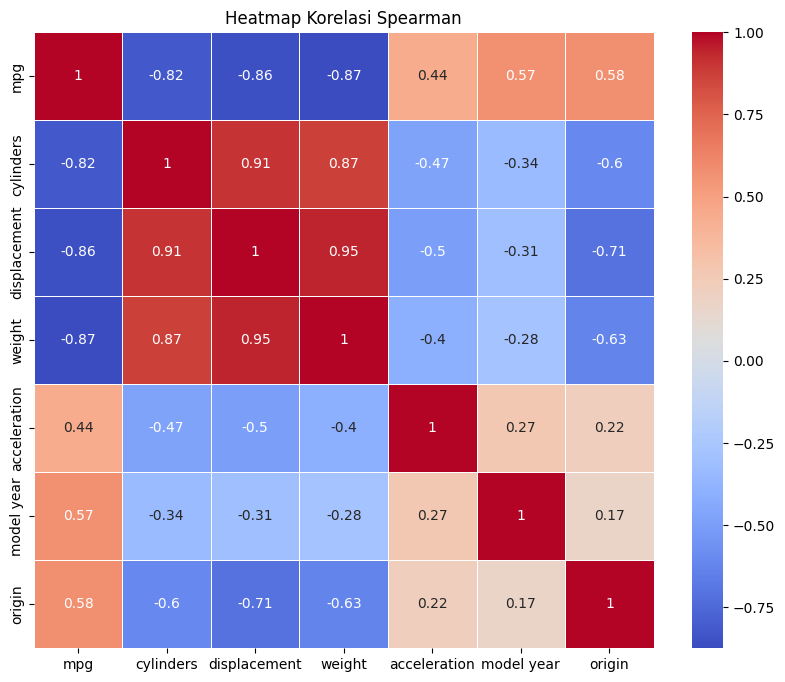

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Spearman")
plt.show()

Kendall Heatmap


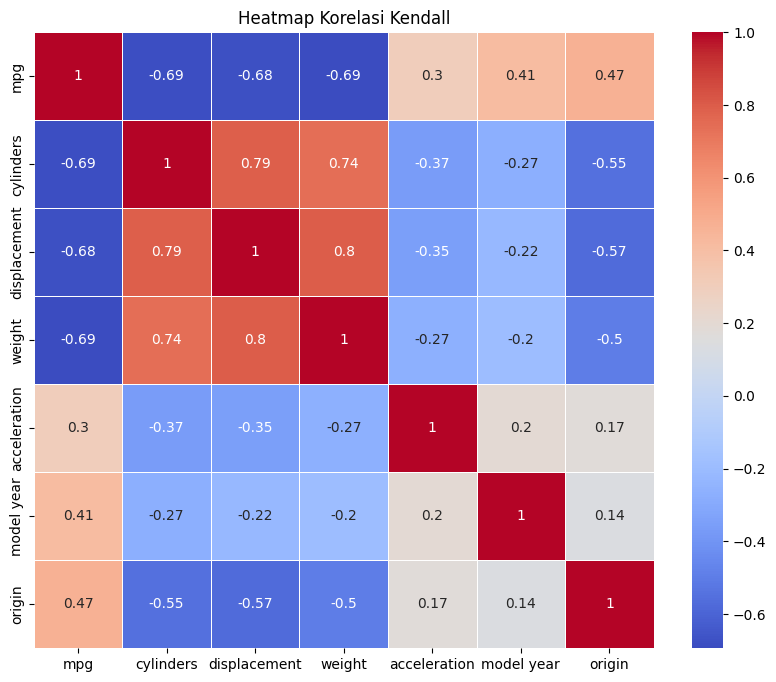

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Kendall")
plt.show()